In [136]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import matplotlib 
from PIL import Image
import PIL
import math
from random import random
from random import seed
from random import randint
import time
from numba import jit

In [175]:
@jit(nopython = True)
def Laplacian(A,deltax,deltat):

    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions            
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            P[i,j] = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j] \
                 -A[i,(j+2)%h] + 16*A[i,(j+1)%h]  + 16*A[i,(j-1)%h] -A[i,(j-2)%h] - 60*A[i,j])/(12*pow(deltax,2))

  
    return P 



def update(N,A1,A2,pA1,pA2,vel1,vel2,omega,eta,deltax,deltat,a,time):
    a1 = 1.71541177447862e-5 * time ** (0.2530363118519119)
    deltaa = a1-a
    da_dt_a = deltaa/deltat/a1 
    dA1 = (A1 - pA1)/deltat
    dA2 = (A2 - pA2)/deltat
    lam = 2*pow(math.pi,2)/pow(omega,2)
    
    pA1,pA2 = A1,A2
    
    F1 = Laplacian(A1,deltax,deltat) - lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2))-3*da_dt_a*dA1
    F2 = Laplacian(A2,deltax,deltat) - lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -3*da_dt_a*dA2
    
    time = time + deltat
    
    a2 = 1.71541177447862e-5 * time ** (0.2530363118519119)
    deltaa = a2-a1
    da_dt_a = deltaa/deltat/a2 
    
    
    A1 = A1 + deltat*(vel1 + 0.5*deltat*F1) 
    A2 = A2 + deltat*(vel2 + 0.5*deltat*F2) 
    
    dA1 = (A1 - pA1)/deltat
    dA2 = (A2 - pA2)/deltat
    
    vel1 = vel1 + deltat/2*(F1 + Laplacian(A1,deltax,deltat) - lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -3*da_dt_a*dA1) 
    vel2 = vel2 + deltat/2*(F2 + Laplacian(A2,deltax,deltat) - lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -3*da_dt_a*dA2)
    
    
    return A1,A2,vel1,vel2,a1,time,pA1,pA2
    
#change the values accordlingly    
def wolff(N,t0,t,A1,A2,vel,omega,eta,deltax,deltat):

    time = t0
    pA1 = np.zeros((N,N))
    pA2 = np.zeros((N,N))
    vel1 = vel
    vel2 = vel
    a = 1.71541177447862e-5 * time ** (0.2530363118519119)


    for i in np.arange(int(t/deltat)):
        time = round(time,1)
        
        if time % 1 == 0:

        
            plt.imsave('1259/'+str(int(time)).zfill(3)+'.png',np.sqrt(pow(A1,2)+pow(A2,2)),vmin = 0, vmax = eta,cmap = 'Greys')
            plt.imsave('1262/'+str(int(time)).zfill(3)+'.png',np.arctan2(A2,A1),vmin = -1*math.pi, vmax = math.pi,cmap = 'twilight')

        A1,A2,vel1,vel2,a,time,pA1,pA2 = update(N,A1,A2,pA1,pA2,vel1,vel2,omega,eta,deltax,deltat,a,time)


    return A1,A2

In [173]:
@jit(nopython = True)
def Laplacian(A,deltax,deltat):

    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions            
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            P[i,j] = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j] \
                 -A[i,(j+2)%h] + 16*A[i,(j+1)%h]  + 16*A[i,(j-1)%h] -A[i,(j-2)%h] - 60*A[i,j])/(12*pow(deltax,2))

  
    return P 



def update(N,A1,A2,pA1,pA2,vel1,vel2,omega,eta,deltax,deltat,a,time):
    a1 = 1.71541177447862e-5 * time ** (0.2530363118519119)
    beta = 0
    alpha = 3
    deltaa = np.log(a1)-np.log(a)
    ln_da_dt = deltaa/np.log(deltat) 
    dA1 = (A1 - pA1)/deltat
    dA2 = (A2 - pA2)/deltat
    lam = 2*pow(math.pi,2)/pow(omega,2)
    
    pA1,pA2 = A1,A2
    
    F1 = Laplacian(A1,deltax,deltat) - a**beta * lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*ln_da_dt*dA1
    F2 = Laplacian(A2,deltax,deltat) - a**beta * lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2))-alpha*ln_da_dt*dA2
    
    time = time + deltat
    
    a2 = 1.71541177447862e-5 * time ** (0.2530363118519119)
    deltaa = np.log(a2)-np.log(a1)
    ln_da_dt = deltaa/np.log(deltat) 
    
    A1 = A1 + deltat*(vel1 + 0.5*deltat*F1) 
    A2 = A2 + deltat*(vel2 + 0.5*deltat*F2) 
    
    dA1 = (A1 - pA1)/deltat
    dA2 = (A2 - pA2)/deltat
    
    vel1 = vel1 + deltat/2*(F1 + Laplacian(A1,deltax,deltat) - a**beta *lam*A1*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -alpha*ln_da_dt*dA1) 
    vel2 = vel2 + deltat/2*(F2 + Laplacian(A2,deltax,deltat) - a**beta *lam*A2*(pow(A1,2)+pow(A2,2)-pow(eta,2)) -alpha*ln_da_dt*dA2)
    
    
    return A1,A2,vel1,vel2,a1,time,pA1,pA2
    
#change the values accordlingly    
def wolff(N,t0,t,A1,A2,vel,omega,eta,deltax,deltat):

    time = t0
    pA1 = np.zeros((N,N))
    pA2 = np.zeros((N,N))
    vel1 = vel
    vel2 = vel
    a = 1.71541177447862e-5 * time ** (0.2530363118519119)


    for i in np.arange(int(t/deltat)):
        time = round(time,1)
        
        if time % 1 == 0:

        
            plt.imsave('1258/'+str(int(time)).zfill(3)+'.png',np.sqrt(pow(A1,2)+pow(A2,2)),vmin = 0, vmax = eta,cmap = 'Greys')
            plt.imsave('1261/'+str(int(time)).zfill(3)+'.png',np.arctan2(A2,A1),vmin = -1*math.pi, vmax = math.pi,cmap = 'twilight')

        A1,A2,vel1,vel2,a,time,pA1,pA2 = update(N,A1,A2,pA1,pA2,vel1,vel2,omega,eta,deltax,deltat,a,time)


    return A1,A2

In [ ]:
start = time.time()


n = 9
deltax = 1
deltat = 0.1
eta = 1
N = pow(2,n)
t = 0.5*N*deltax/deltat # light crossing time
t0 = 0.1
t2 = t/2 # half time
t5 = t/5
t10 = t/10 # 1/10 of the ligth crossing time

vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5

print(t)



A1 = np.random.normal(mu, sigma, size=(N, N))
A2 = np.random.normal(mu,sigma,size=(N,N))

A1,A2 = wolff(N,t0,t5,A1,A2,vel,omega,eta,deltax,deltat)

end = time.time()
print(end - start)

2560.0


In [5]:
Laplacian(np.zeros((10,10)),1,0.1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
import scipy.integrate as integrate

import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)

result

(1.1178179380783253, 7.866317216380692e-09)

In [129]:
H_0 = 2.18e-18
omega_r = 9.24e-5
omega_m = 0.315
omega_lambda = 0.685
omega_k = 0
time = []
Hubble = []
a = np.linspace(1e-6,1.5e-4,100000)
a = np.around(a,6)

                         
for i in range(0,len(a)):
    H = H_0 * np.sqrt(omega_r * pow(a[i],-4) + omega_m * pow(a[i],-3) + omega_k * pow(a[i],-2) + omega_lambda)
    integrand = lambda x: x/(np.sqrt(omega_r * pow(x,-4) + omega_m * pow(x,-3) + omega_k * pow(x,-2) + omega_lambda))
    t= integrate.quad(integrand,0,a[i])
    time.append(t[0]/H_0)
    Hubble.append(H)

5095.073942873085


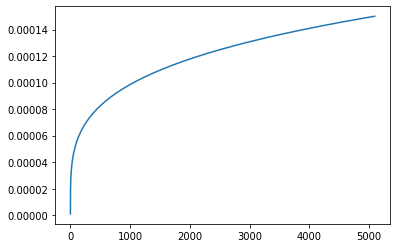

In [130]:
plt.plot(time,a)
print(time[-1])


In [131]:
import pandas as pd

dict = {'time (t)': time, 'Scale factor (a)': a, 'Hubble Parameter (H)': Hubble}
df = pd.DataFrame(dict)
df.to_csv('Integrations.csv')

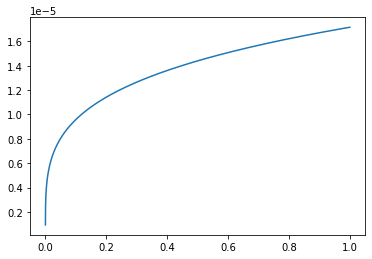

In [132]:
x = np.linspace(1e-5,1,10000)
y = 1.71541177447862e-5 * x ** (0.2530363118519119)
plt.plot(x,y)